In [27]:
# importing modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt


In [28]:
tf.config.list_physical_devices('GPU')

[]

In [29]:
os.getcwd()

'/Users/adityakumar/Documents/CSC 496/CSC496-Deobcomp'

In [30]:
# load data
import zipfile
with zipfile.ZipFile("image_dataset.zip", 'r') as zip_ref:
        zip_ref.extractall()
data = tf.keras.utils.image_dataset_from_directory('img', label_mode='categorical', image_size=(64, 64), color_mode='grayscale')

Found 6436 files belonging to 5 classes.


In [31]:
# scale data to be from 0 to 1
print(len(data))
data = data.map(lambda image, label: (image/255, label))
print(len(data))



202
202


In [32]:
# train test val split
train = data.take(int(len(data)*.6))
val = data.skip(int(len(data)*.6)).take(int(len(data)*.2))
test = data.skip(int(len(data)*.8)).take(int(len(data)*.2))

In [33]:
len(data)

202

In [34]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [35]:
model = Sequential()

In [36]:
model.add(Conv2D(30, (3,3), 1, activation='relu', input_shape=(64,64,1)))
model.add(MaxPooling2D())

model.add(Conv2D(15, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [37]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['F1Score', 'accuracy'])


In [ ]:
model.summary()

In [39]:
hist = model.fit(train, epochs=50, validation_data=val)

Epoch 1/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - F1Score: 0.5375 - accuracy: 0.5453 - loss: 1.0906 - val_F1Score: 0.9391 - val_accuracy: 0.9406 - val_loss: 0.1807
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - F1Score: 0.9369 - accuracy: 0.9364 - loss: 0.2250 - val_F1Score: 0.9682 - val_accuracy: 0.9688 - val_loss: 0.0932
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - F1Score: 0.9598 - accuracy: 0.9586 - loss: 0.1362 - val_F1Score: 0.9658 - val_accuracy: 0.9672 - val_loss: 0.0845
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - F1Score: 0.9778 - accuracy: 0.9773 - loss: 0.0840 - val_F1Score: 0.9792 - val_accuracy: 0.9797 - val_loss: 0.0539
Epoch 5/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - F1Score: 0.9860 - accuracy: 0.9859 - loss: 0.0500 - val_F1Score: 0.9844 - val_accuracy: 0.9844 - val_loss: 0.0471
Epoch 6/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - F1Score: 0.9850 - accuracy: 0.9848 - loss: 0.0517 - val_F1Score: 0.9791 - val_accuracy: 0.9797 - val

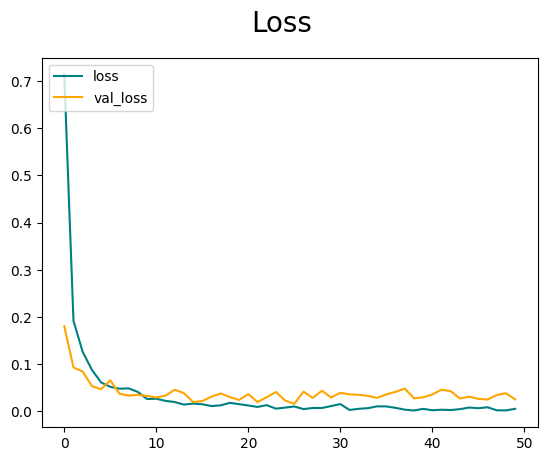

In [40]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [41]:
model.evaluate(test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - F1Score: 0.9932 - accuracy: 0.9939 - loss: 0.0222


[0.02305038459599018,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([0.99118936, 0.985447  , 0.9922779 , 0.99827874, 1.        ],
       dtype=float32)>,
 0.9937499761581421]

In [42]:

import cv2

1/1 [==============================] - 0s 181ms/step


array([[6.0428749e-04, 9.9936920e-01, 2.4107567e-05, 2.4661392e-06,
        2.2489536e-08]], dtype=float32)

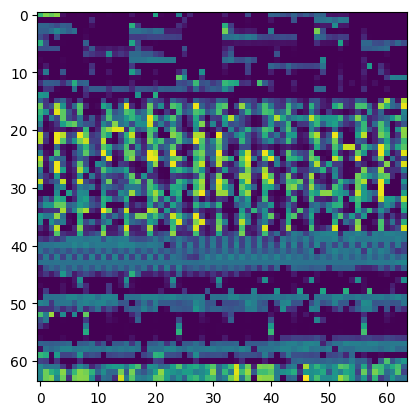

In [ ]:
img = cv2.imread('img/encodea/dled_encodea_0.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
yhat = model.predict(np.expand_dims(img/255, 0))
yhat

In [43]:
model.save(os.path.join('models','obf_classifier.keras'))